<a href="https://colab.research.google.com/github/sarnavadatta/Finance-in-Python/blob/main/BollingerBands_RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Create a trading strategy using Bollinger Bands and RSI Indicator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

import datetime as dt

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [ ]:
# Define Bollinger Bands
def bollinger_bands(data, window_size = 30):
    rolling_mean = data['Close'].rolling(window = window_size).mean() # simple moving avg
    rolling_std = data['Close'].rolling(window = window_size).std()
    data['UpperBand'] = rolling_mean + (2*rolling_std)
    data['LowerBand'] = rolling_mean - (2*rolling_std)
    return data

In [ ]:
# Define RSI
def RSI(data, window=13):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    RS = avg_gain/avg_loss
    RSI = 100 - (100/(1+RS))
    data['RSI'] = RSI
    data['Overbought'] = 70
    data['Oversold'] = 30
    return data

In [ ]:
# Define a strategy
def strategy(data):
    position = 0
    buy_price =[]
    sell_price =[]

    for i in range(len(data)):
        if data['Close'][i] < data['LowerBand'][i] and data['RSI'][i] < data['Oversold'][i] and position == 0:
            position = 1
            buy_price.append(data['Close'][i])
            sell_price.append(np.nan)
        elif data['Close'][i] > data['UpperBand'][i] and data['RSI'][i] > data['Overbought'][i] and position == 1:
            position = 0
            sell_price.append(data['Close'][i])
            buy_price.append(np.nan)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
    return (buy_price,sell_price)

In [ ]:
# Get the stock ticker TATAMOTORS
tickers = 'TATAMOTORS.NS'

# Get the stock data
df = yf.download(tickers, start='2019-01-01', end= '2024-04-30')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,173.500000,174.199997,171.300003,173.449997,172.911087,6715543
2019-01-02,170.600006,171.750000,168.000000,168.550003,168.026321,13410104
2019-01-03,169.000000,170.149994,165.100006,166.050003,165.534088,9321842
2019-01-04,169.000000,171.949997,168.500000,170.949997,170.418854,17650435
2019-01-07,173.199997,178.199997,173.199997,175.350006,174.805191,21438351
...,...,...,...,...,...,...
2024-04-23,976.000000,994.500000,974.049988,986.750000,986.750000,7994116
2024-04-24,992.400024,995.900024,988.000000,991.650024,991.650024,4671450
2024-04-25,992.500000,1003.299988,989.500000,1001.250000,1001.250000,8366455


In [ ]:
df = bollinger_bands(df) # Add Bollinger Bands
df = RSI(df) # Add RSI

# Implementing our trading strategy
buy_price, sell_price = strategy(df)
df['Buy'] = buy_price
df['Sell'] = sell_price

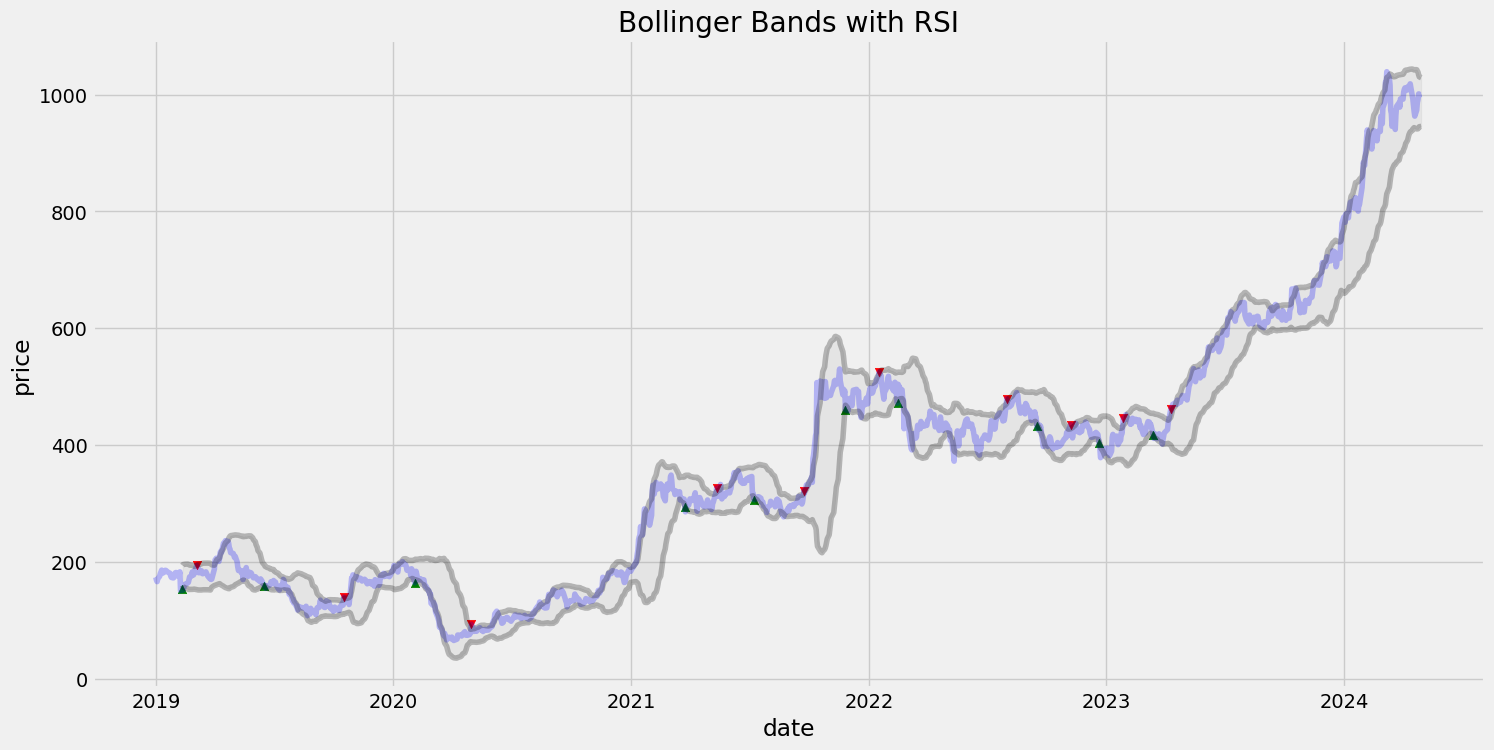

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
plt.title('Bollinger Bands with RSI')
plt.ylabel('price')
plt.xlabel('date')
ax.plot(df['Close'], label='Close Price', alpha=0.25, color='blue')
ax.plot(df['UpperBand'], label='Upper Band', alpha=0.25, color='black')
ax.plot(df['LowerBand'], label='Lower Band', alpha=0.25, color='black')
ax.fill_between(df.index, df['UpperBand'], df['LowerBand'], alpha=0.1, color= 'grey')
ax.scatter(df.index, df['Buy'], label='Buy', alpha=1, marker='^',color='green')
ax.scatter(df.index, df['Sell'], label='Sell', alpha=1, marker='v',color='red')
plt.legend
plt.show()